**Mammographic Masses Analysis**

**Project Overview**

This project aims to analyze mammographic mass data to aid in the prediction of benign and malignant tumors. Using features such as mass shape, margin, density, and patient age, we build machine learning models to classify masses, contributing to early detection and treatment planning efforts.

**Dataset**

The mammographic masses dataset includes the following features:

**BI-RADS assessment**: 1 to 5 (ordinal)

**Age**: Patient's age in years (integer)

**Shape**: Mass shape (categorical: round, oval, lobular, irregular)

**Margin**: Mass margin (categorical: circumscribed, microlobulated, obscured, ill-defined, spiculated)

**Density**: Mass density (ordinal: high, iso, low, fat-containing)

**Severity**: Benign (0) or malignant (1) (binary)
Data is anonymized and sourced from public medical studies.

**Installation**
To replicate the analysis, ensure you have Python 3.6+ installed along with the following libraries:

Pandas
NumPy
Matplotlib
Scikit-learn

Install dependencies using the following command:

sh
Copy code
pip install pandas numpy matplotlib scikit-learn
Files in the Repository
mammographic_masses.ipynb: The Jupyter notebook containing the detailed analysis and modeling.
data/mammographic_masses.data: The dataset used in the analysis.

Running the Analysis
Open the Jupyter notebook in a Jupyter Lab or Notebook environment:

sh
Copy code
jupyter notebook mammographic_masses.ipynb

Follow the notebook sections which are divided into:

Introduction and Dataset Overview
Data Cleaning and Preprocessing
Exploratory Data Analysis (EDA)
Feature Engineering and Selection
Model Training and Evaluation
Conclusions

**Contributions**

Contributions, suggestions, and issues are welcome! Please feel free to fork the repository and submit pull requests.

**Mounting Google Drive to Colab to access files stored in Google Drive.**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


**Importing all required libraries for reading, analysing and visualizing the data**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

**Loading and displaying the dataset**

In [3]:
# Loading and displaying the dataset
dataset = "/content/gdrive/MyDrive/Machine Learning (Integrify)/ML Projects/mammographic_masses.csv"
df = df = pd.read_csv(dataset)

**The data has 6 columns with 961 rows**

In [4]:
df

,BI-RADS_assessment,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [5]:
df.describe(include = 'all')

,BI-RADS_assessment,Age,Shape,Margin,Density,Severity
count,961,961,961,961,961,961.000000
unique,8,74,5,6,5,NaN
top,4,59,4,1,3,NaN
freq,547,36,400,357,798,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.463059
std,NaN,NaN,NaN,NaN,NaN,0.498893
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000


**Data Description**

1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)  
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal, goal field!)

**Checking for Unique values in categorical columns**

We can see the data contains the symbol '?', the numbers '55', '0' and '6'.  which isn't supposed to be. Therefore the dataset needs some cleaning. Hence, I removed them from the dataset.

In [6]:
#Creating a subset of the original df and printing the Unique values of the categorical columns
focus_cols = df[['BI-RADS_assessment','Shape', 'Margin', 'Density', 'Severity']]
for col in focus_cols:
    print(f'{col} uniques: {focus_cols[col].unique()}')

BI-RADS_assessment uniques: ['5' '4' '3' '?' '2' '55' '0' '6']
Shape uniques: ['3' '1' '4' '?' '2']
Margin uniques: ['5' '1' '?' '4' '3' '2']
Density uniques: ['3' '?' '1' '2' '4']
Severity uniques: [1 0]


In [ ]:
# Converting the 'Age' column to integers
# This also handle any non-numeric values and convert them to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [ ]:
# Replacing '?' with None (null value)
df.replace('?', None, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS_assessment  959 non-null    object 
 1   Age                 956 non-null    float64
 2   Shape               930 non-null    object 
 3   Margin              913 non-null    object 
 4   Density             885 non-null    object 
 5   Severity            961 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 45.2+ KB


In [ ]:
# Dropping rows with any missing values (NaNs)
df = df.dropna()

In [ ]:
# Column name to filter specific values
column_name = 'BI-RADS_assessment'

# Ensuring that the column is of string type for accurate filtering
df[column_name] = df[column_name].astype(str)

# Removing rows where the 'BI-RADS_assessment' column has values '0', '55', or '6'
df_filtered = df[~df[column_name].isin(['0', '55', '6'])]

<ipython-input-10-50afab36c1ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype(str)


**Checking the categorical columns again if the data is cleaned**

In [ ]:
#Creating a subset of the original df and printing the Unique values of the categorized columns
focus_cols = df_filtered[['BI-RADS_assessment','Shape', 'Margin', 'Density', 'Severity']]
for col in focus_cols:
    print(f'{col} uniques: {focus_cols[col].unique()}')

BI-RADS_assessment uniques: ['5' '4' '3' '2']
Shape uniques: ['3' '4' '1' '2']
Margin uniques: ['5' '1' '4' '3' '2']
Density uniques: ['3' '2' '1' '4']
Severity uniques: [1 0]


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS_assessment  815 non-null    object 
 1   Age                 815 non-null    float64
 2   Shape               815 non-null    object 
 3   Margin              815 non-null    object 
 4   Density             815 non-null    object 
 5   Severity            815 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 44.6+ KB


In [ ]:
#Verifying the data type in the dataframe
df_filtered.dtypes.value_counts()

object     4
float64    1
int64      1
dtype: int64

In [ ]:
# Finding the oldest and youngest ages in the 'Age' column
oldest_age = df_filtered['Age'].max()
youngest_age = df_filtered['Age'].min()

print("Oldest age:", oldest_age)
print("Youngest age:", youngest_age)


Oldest age: 96.0
Youngest age: 18.0


**Categorized the age into two groups: 18 - 50 and 51 - 96**

<ipython-input-15-823a368201ce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age_Group'] = df_filtered['Age'].apply(categorize_age)


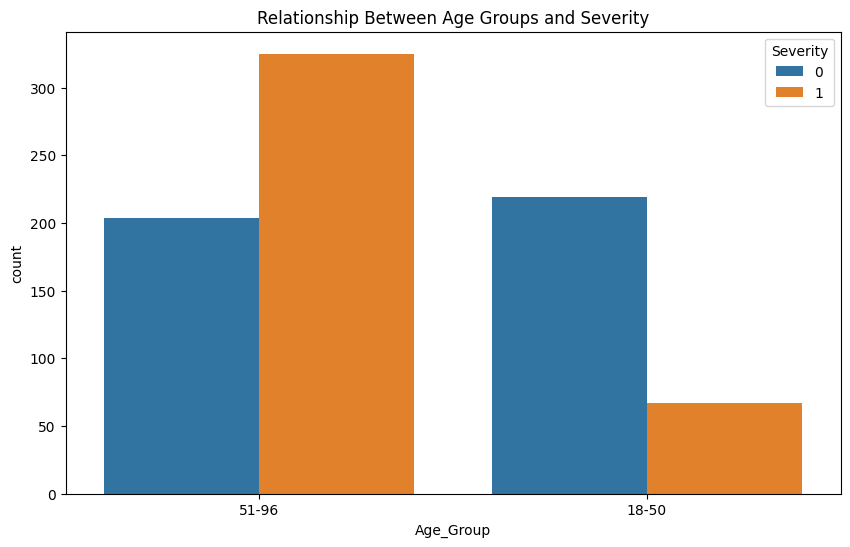

Total count in 18 to 50 age group: 286
Total count in 51 to 96 age group: 529


In [ ]:
# Function to categorize age
def categorize_age(age):
    if 18 <= age <= 50:
        return '18-50'
    elif 51 <= age <= 96:
        return '51-96'
    else:
        return 'Other'

# Apply the function to the 'Age' column
df_filtered['Age_Group'] = df_filtered['Age'].apply(categorize_age)

# Removing 'Other' category if you only want the specified ranges
df_filtered = df_filtered[df_filtered['Age_Group'] != 'Other']

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Age_Group', hue='Severity')
plt.title('Relationship Between Age Groups and Severity')
plt.show()

# Count the total in each age group
age_group_counts = df_filtered['Age_Group'].value_counts()

# Extracting counts for each group
count_18_50 = age_group_counts.get('18-50', 0)
count_51_96 = age_group_counts.get('51-96', 0)

print(f"Total count in 18 to 50 age group: {count_18_50}")
print(f"Total count in 51 to 96 age group: {count_51_96}")

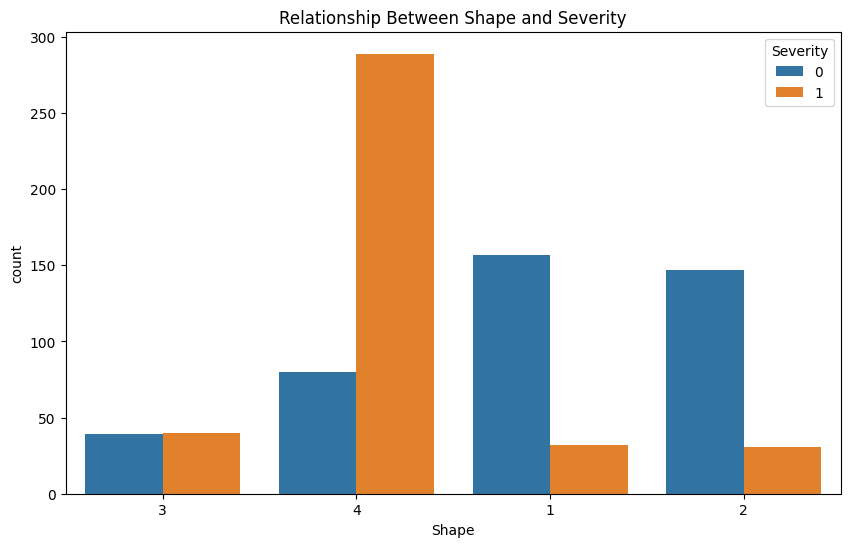

In [ ]:
# Plotting Shape vs Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Shape', hue='Severity')
plt.title('Relationship Between Shape and Severity')
plt.show()

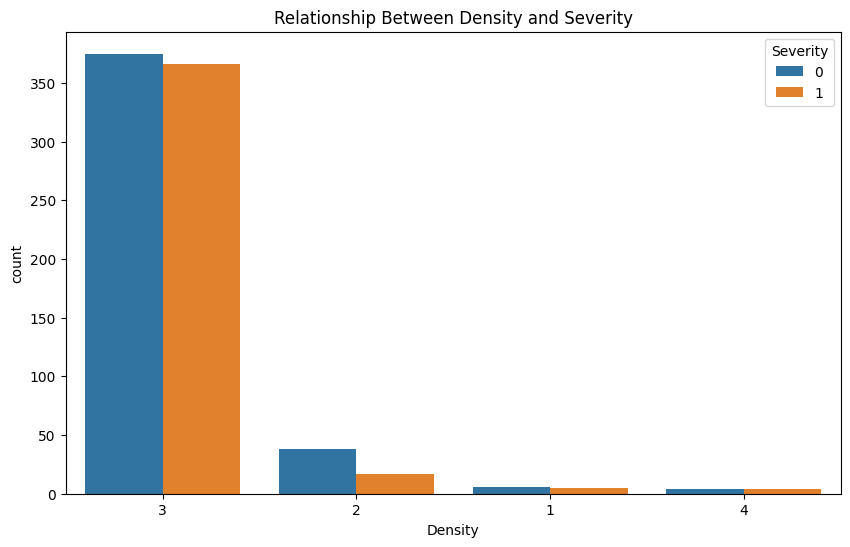

In [ ]:
# Plotting Density vs Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Density', hue='Severity')
plt.title('Relationship Between Density and Severity')
plt.show()

Since  machine learning algorithms typically require numerical inputs, I encoded the categorical columns into numerical format using scikit-learn's LabelEncoder

In [ ]:
# Encoding categorical columns
label_encoder = LabelEncoder()
object_columns = df_filtered.select_dtypes(include=['object']).columns
for col in object_columns:
    df_filtered.loc[:, col] = label_encoder.fit_transform(df_filtered[col])

<ipython-input-18-cc915a6cdf5d>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_filtered.loc[:, col] = label_encoder.fit_transform(df_filtered[col])
<ipython-input-18-cc915a6cdf5d>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_filtered.loc[:, col] = label_encoder.fit_transform(df_filtered[col])
<ipython-input-18-cc915a6cdf5d>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = 

creating a new DataFrame X by removing the Severity column from the df.
Making X the dataframe that contains only the features that will be used for predictions.
Also Making Severity the target column = y.

Then splitting the data into training and test sets.

In [ ]:
# Setting up data for modeling
X = df.drop(['Severity'], axis=1)
y = df['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Doing feature scaling on the training and test datasets using scikit-learn's StandardScaler. This ensures that each feature contributes equally to the model by standardizing the range of the data features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler instance
standard_scaler = StandardScaler()

# Fitting the scaler to the training data and transform the training data
X_train_scaled = standard_scaler.fit_transform(X_train)

# Transforming the test data
X_test_scaled = standard_scaler.transform(X_test)

**Training and Evaluating the models**

In [ ]:
# Model training and evaluation function
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_mat)

# Models
models = [GaussianNB(), LogisticRegression(), RandomForestClassifier(n_estimators=50, random_state=42),
          AdaBoostClassifier(n_estimators=100, random_state=42), SVC(kernel='rbf'), DecisionTreeClassifier(), GradientBoostingClassifier()]


# Training and evaluating each model
for model in models:
    print(f"Training {model.__class__.__name__}...")
    # Choose the right scaled data based on the model
    if isinstance(model, MultinomialNB):
        train_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    else:
        train_evaluate_model(model, X_train, X_test, y_train, y_test)
    print("-" * 30)

Training GaussianNB...
Accuracy: 0.84
Confusion Matrix:
[[75 14]
 [13 64]]
------------------------------
Training LogisticRegression...
Accuracy: 0.84
Confusion Matrix:
[[73 16]
 [10 67]]
------------------------------
Training RandomForestClassifier...
Accuracy: 0.78
Confusion Matrix:
[[66 23]
 [14 63]]
------------------------------
Training AdaBoostClassifier...
Accuracy: 0.81
Confusion Matrix:
[[77 12]
 [20 57]]
------------------------------
Training SVC...
Accuracy: 0.78
Confusion Matrix:
[[62 27]
 [ 9 68]]
------------------------------
Training DecisionTreeClassifier...
Accuracy: 0.78
Confusion Matrix:
[[70 19]
 [18 59]]
------------------------------
Training GradientBoostingClassifier...
Accuracy: 0.80
Confusion Matrix:
[[74 15]
 [18 59]]
------------------------------


In [ ]:
# Selecting a couple of models to make predictions - GaussianNB and LogisticRegression for example
models_to_predict = [GaussianNB(), LogisticRegression()]

# After training these models I simulate the training here for demonstration purposes
for model in models_to_predict:
    if model.__class__.__name__ == 'MultinomialNB':
        # For MultinomialNB, use scaled data
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
    else:
        # For other models, use original data
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

    # Output predictions
    print(f"Predictions with {model.__class__.__name__}: {predictions}")

    # Calculate and print accuracy for demonstration
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy for {model.__class__.__name__}: {accuracy:.2f}\n")

Predictions with GaussianNB: [0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1
 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1
 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0]
Accuracy for GaussianNB: 0.84

Predictions with LogisticRegression: [0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1
 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0]
Accuracy for LogisticRegression: 0.84



**Feature Importance**

This is done to identify the significance of each feature in the dataset in contributing to the predictive power of a model.

It helps in understanding the data better, and also provide a scope on how the model's performance could be improved.

In [ ]:
# Training and evaluating model function with feature importance
def train_evaluate_model(model, X_train, X_test, y_train, y_test, feature_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_mat)

    # Plot feature importances if the model has this attribute
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        sorted_indices = np.argsort(feature_importances)[::-1]

        plt.figure(figsize=(20, 6))
        plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
        plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=-45)
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.title(f"{model.__class__.__name__} Feature Importance")
        plt.show()

In [ ]:
# Models
models = [DecisionTreeClassifier(max_depth=8, random_state=42),
          RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)]

In [ ]:
# Feature names
feature_names = df.drop(['Severity'], axis=1).columns.tolist()

Training DecisionTreeClassifier...
Accuracy: 0.81
Confusion Matrix:
[[73 16]
 [15 62]]


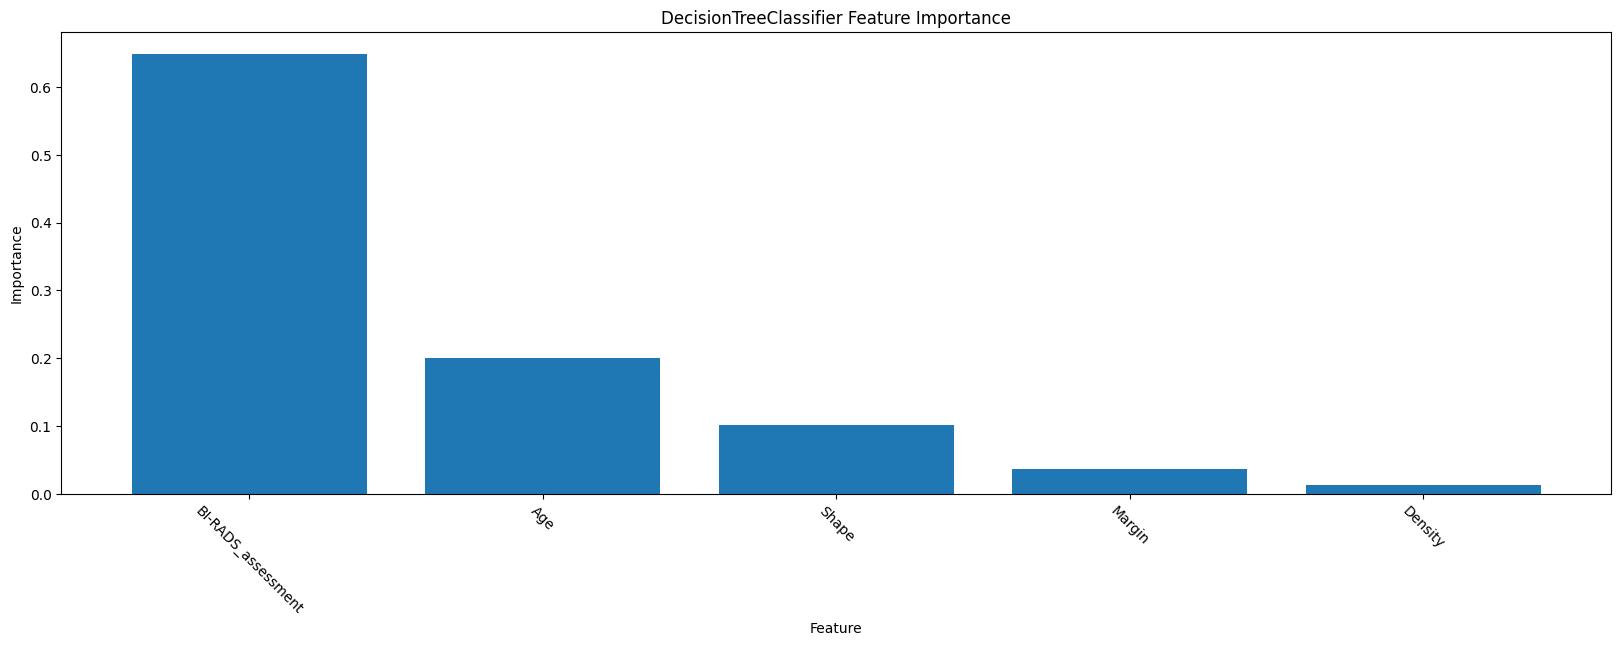

------------------------------
Training RandomForestClassifier...
Accuracy: 0.80
Confusion Matrix:
[[70 19]
 [14 63]]


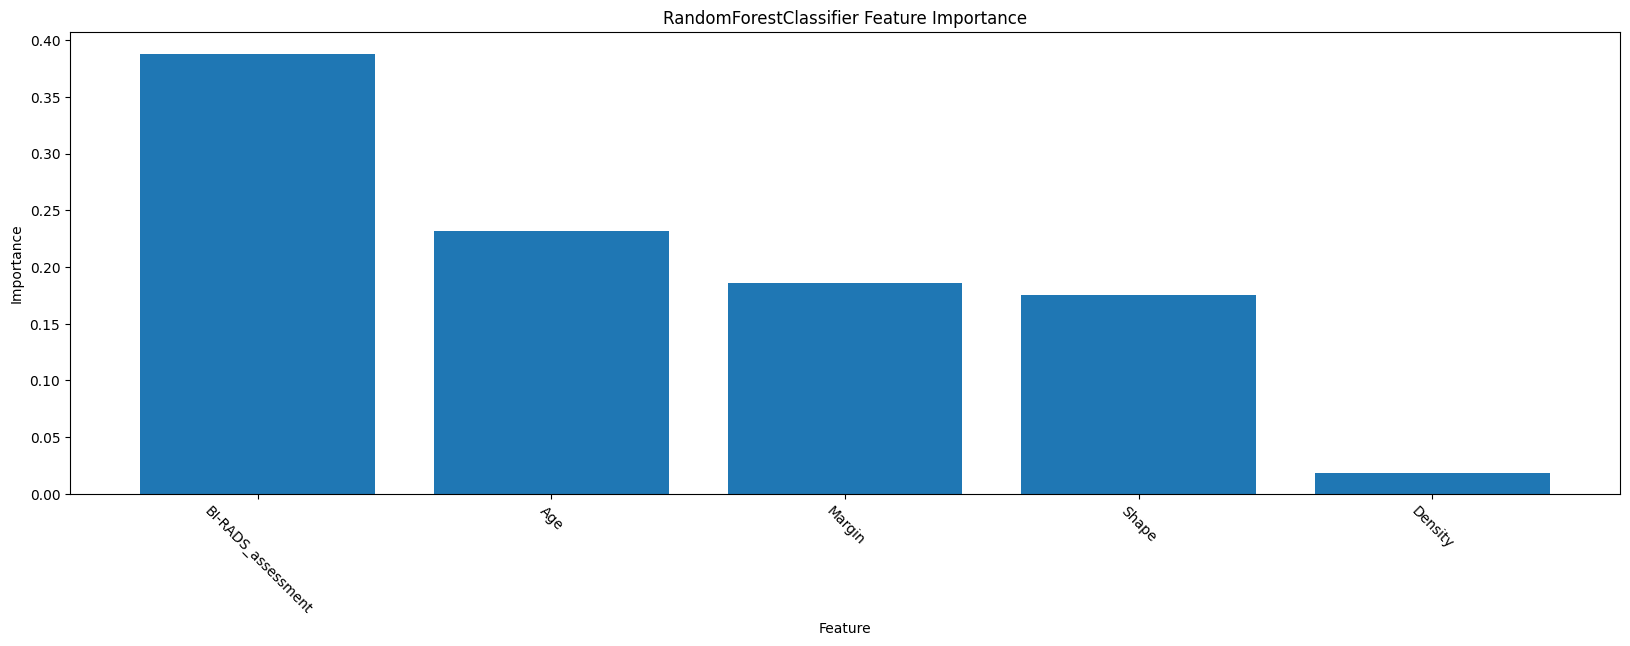

------------------------------


In [ ]:
# Training and evaluating each model
for model in models:
    print(f"Training {model.__class__.__name__}...")
    train_evaluate_model(model, X_train, X_test, y_train, y_test, feature_names)
    print("-" * 30)

[Text(0.6682692307692307, 0.9444444444444444, 'BI-RADS_assessment <= 4.5\ngini = 0.5\nsamples = 422\nvalue = [329, 335]\nclass = 0'),
 Text(0.4519230769230769, 0.8333333333333334, 'Age <= 69.5\ngini = 0.334\nsamples = 258\nvalue = [309, 83]\nclass = 1'),
 Text(0.23076923076923078, 0.7222222222222222, 'Shape <= 2.5\ngini = 0.281\nsamples = 237\nvalue = [299, 61]\nclass = 1'),
 Text(0.10897435897435898, 0.6111111111111112, 'Margin <= 3.5\ngini = 0.16\nsamples = 161\nvalue = [229, 22]\nclass = 1'),
 Text(0.0641025641025641, 0.5, 'Age <= 67.5\ngini = 0.141\nsamples = 149\nvalue = [217, 18]\nclass = 1'),
 Text(0.02564102564102564, 0.3888888888888889, 'Age <= 40.5\ngini = 0.108\nsamples = 145\nvalue = [215, 13]\nclass = 1'),
 Text(0.01282051282051282, 0.2777777777777778, 'gini = 0.0\nsamples = 48\nvalue = [85, 0]\nclass = 1'),
 Text(0.038461538461538464, 0.2777777777777778, 'Margin <= 1.5\ngini = 0.165\nsamples = 97\nvalue = [130, 13]\nclass = 1'),
 Text(0.02564102564102564, 0.16666666666666

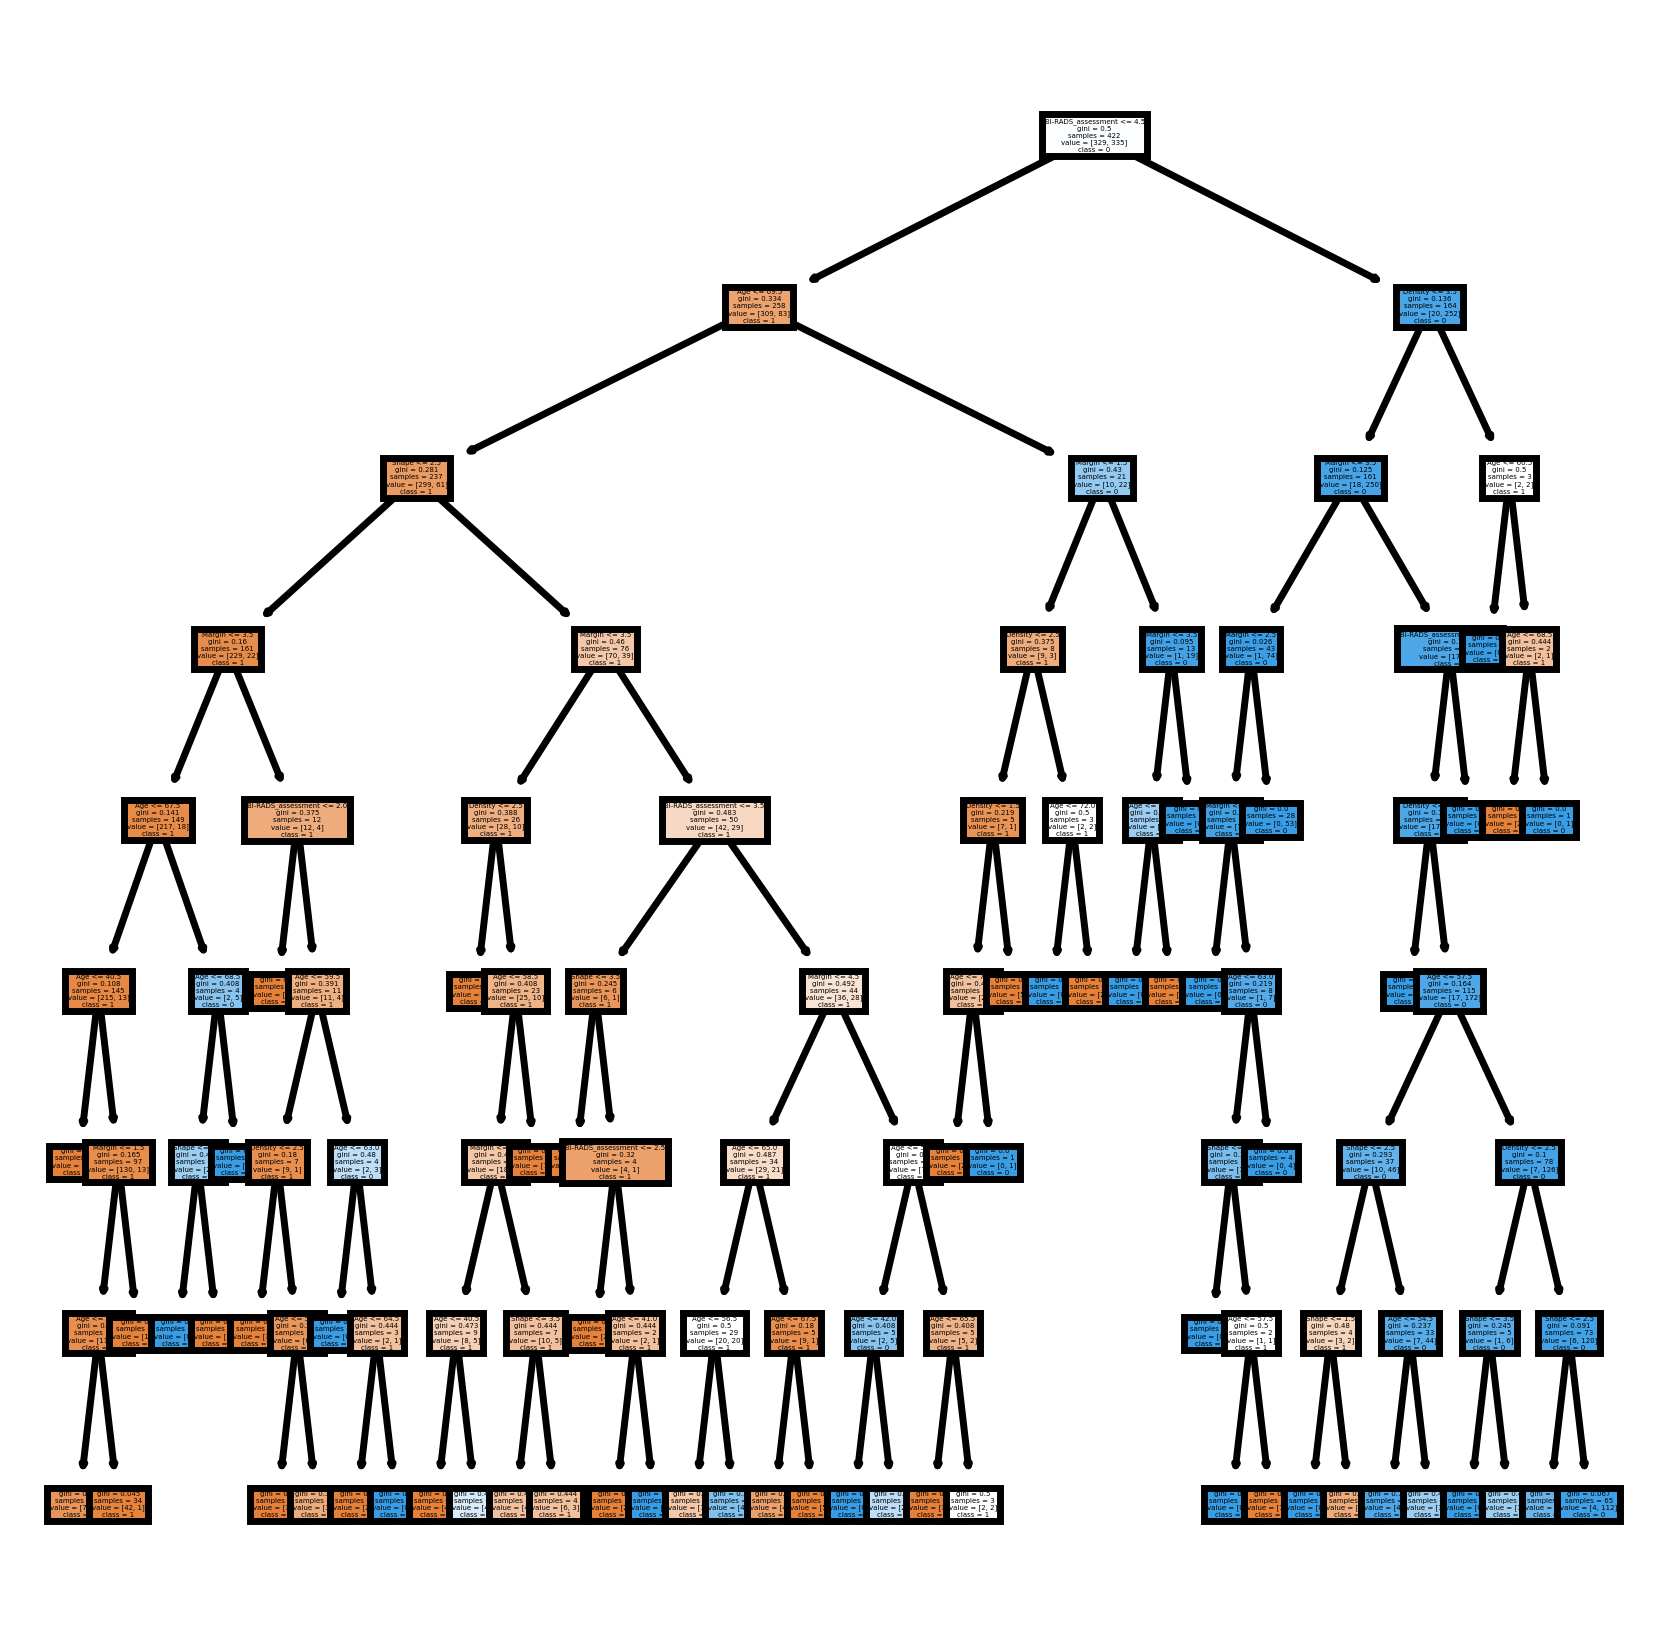

In [ ]:
# Decision Tree Visualization for Random Forest
from sklearn import tree

model = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)
model.fit(X_train, y_train)

fn = feature_names
cn = ['1', '0']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=500)
tree.plot_tree(model.estimators_[0], feature_names=fn, class_names=cn, filled=True)
# fig.savefig('model_individualtree.png')